In [85]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import mplfinance as mpf
from sklearn.linear_model import LinearRegression
from datetime import timedelta

In [87]:
# mount and read data and assign to df
df = pd.read_csv("HDL_.csv")

In [88]:
df

,BUSINESS DATE,CLOSE PRICE,HIGH PRICE,LOW PRICE,TOTAL TRADED QUANTITY,TOTAL TRADED VALUE,TOTAL TRADES
0,2025-02-12,1195.2,1232.0,1191.3,29842,35881190.5,599
1,2025-02-11,1208.0,1241.0,1200.0,68395,82933826.9,999
2,2025-02-10,1193.0,1200.0,1187.0,23264,27697301.2,372
3,2025-02-09,1194.0,1205.0,1190.1,27673,33098927.2,439
4,2025-02-06,1198.0,1210.0,1181.1,56538,67348051.3,679
...,...,...,...,...,...,...,...
224,2024-02-21,1486.0,1504.3,1475.1,22479,33440316.8,587
225,2024-02-20,1474.9,1485.0,1460.0,33909,49951897.0,832
226,2024-02-18,1485.0,1515.0,1480.0,41838,62387531.8,1199
227,2024-02-15,1513.9,1545.0,1510.0,30579,46393760.5,854


In [89]:
# Ensure BUSINESS DATE is in datetime format
df['BUSINESS DATE'] = pd.to_datetime(df['BUSINESS DATE'])

# Extract the day and month
df['DAY'] = df['BUSINESS DATE'].dt.day
df['MONTH'] = df['BUSINESS DATE'].dt.month
df['YEAR'] = df['BUSINESS DATE'].dt.year

# Display the updated DataFrame
print(df.head())

  BUSINESS DATE  CLOSE PRICE  HIGH PRICE  LOW PRICE  TOTAL TRADED QUANTITY  \
0    2025-02-12       1195.2      1232.0     1191.3                  29842   
1    2025-02-11       1208.0      1241.0     1200.0                  68395   
2    2025-02-10       1193.0      1200.0     1187.0                  23264   
3    2025-02-09       1194.0      1205.0     1190.1                  27673   
4    2025-02-06       1198.0      1210.0     1181.1                  56538   

   TOTAL TRADED VALUE  TOTAL TRADES  DAY  MONTH  YEAR  
0          35881190.5           599   12      2  2025  
1          82933826.9           999   11      2  2025  
2          27697301.2           372   10      2  2025  
3          33098927.2           439    9      2  2025  
4          67348051.3           679    6      2  2025  


In [15]:
df

,BUSINESS DATE,CLOSE PRICE,HIGH PRICE,LOW PRICE,TOTAL TRADED QUANTITY,TOTAL TRADED VALUE,TOTAL TRADES,DAY,MONTH,YEAR
0,2025-02-12,1195.2,1232.0,1191.3,29842,35881190.5,599,12,2,2025
1,2025-02-11,1208.0,1241.0,1200.0,68395,82933826.9,999,11,2,2025
2,2025-02-10,1193.0,1200.0,1187.0,23264,27697301.2,372,10,2,2025
3,2025-02-09,1194.0,1205.0,1190.1,27673,33098927.2,439,9,2,2025
4,2025-02-06,1198.0,1210.0,1181.1,56538,67348051.3,679,6,2,2025
...,...,...,...,...,...,...,...,...,...,...
224,2024-02-21,1486.0,1504.3,1475.1,22479,33440316.8,587,21,2,2024
225,2024-02-20,1474.9,1485.0,1460.0,33909,49951897.0,832,20,2,2024
226,2024-02-18,1485.0,1515.0,1480.0,41838,62387531.8,1199,18,2,2024
227,2024-02-15,1513.9,1545.0,1510.0,30579,46393760.5,854,15,2,2024


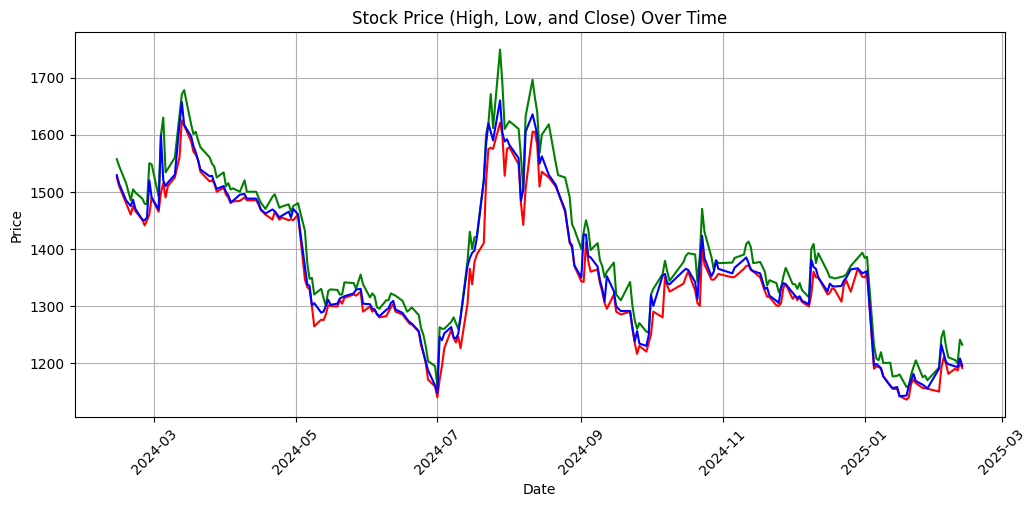

In [16]:
# Load the dataset (assuming it's a DataFrame `df`)
# Convert 'BUSINESS DATE' to datetime format
df = df.sort_values(by="BUSINESS DATE", ascending=True)

plt.figure(figsize=(12, 5))
plt.plot(df["BUSINESS DATE"], df["HIGH PRICE"], linestyle='-', color='g', label='High Price')
plt.plot(df["BUSINESS DATE"], df["LOW PRICE"], linestyle='-', color='r', label='Low Price')
plt.plot(df["BUSINESS DATE"], df["CLOSE PRICE"], linestyle='-', color='b', label='Close Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price (High, Low, and Close) Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Since the price is decreasing, it's not an appropriate time to sell the shares of HDL. But to buy the shares, it's very likely that the price will go up. Even though there's a chance that the price will go further down, it is very likely that the price will surpass the buying price someday, as given in the graph from 07-2024 to 08-2024. So, it is an appropriate time to buy the shares of HDL instead of selling. If the trader has shares of HDL and decides not to buy, holding the share is also an appropriate choice.

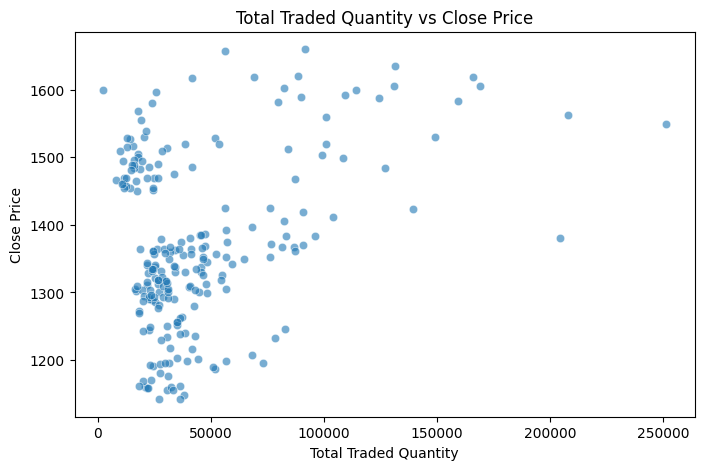

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["TOTAL TRADED QUANTITY"], y=df["CLOSE PRICE"], alpha=0.6)
plt.xlabel("Total Traded Quantity")
plt.ylabel("Close Price")
plt.title("Total Traded Quantity vs Close Price")
plt.show()

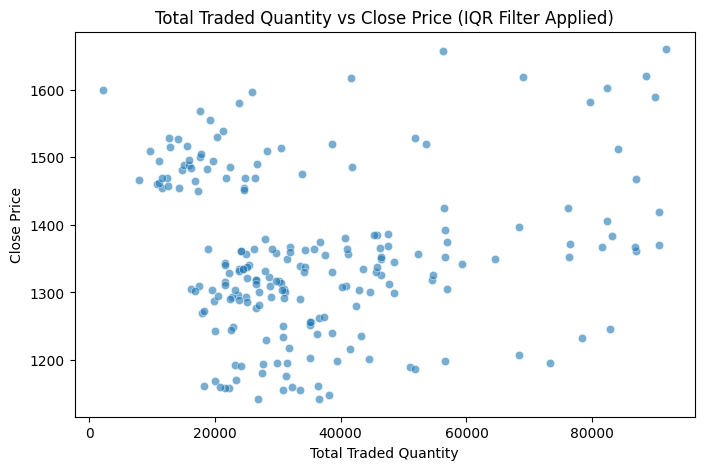

In [18]:
Q1 = df["TOTAL TRADED QUANTITY"].quantile(0.25)
Q3 = df["TOTAL TRADED QUANTITY"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df["TOTAL TRADED QUANTITY"] >= lower_bound) & (df["TOTAL TRADED QUANTITY"] <= upper_bound)]

# Plot again without outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_filtered["TOTAL TRADED QUANTITY"], y=df["CLOSE PRICE"], alpha=0.6)
plt.xlabel("Total Traded Quantity")
plt.ylabel("Close Price")
plt.title("Total Traded Quantity vs Close Price (IQR Filter Applied)")
plt.show()

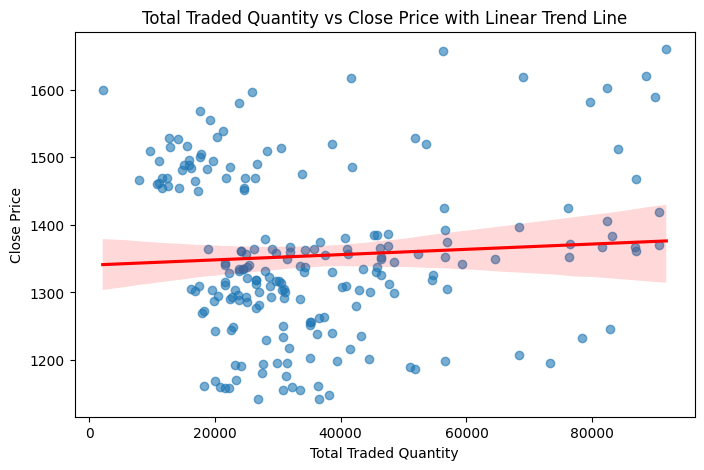

In [19]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df_filtered["TOTAL TRADED QUANTITY"], y=df_filtered["CLOSE PRICE"], scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.xlabel("Total Traded Quantity")
plt.ylabel("Close Price")
plt.title("Total Traded Quantity vs Close Price with Linear Trend Line")
plt.show()

Since the close price is very slightly increasing up to about the close price of 5-10 as the total traded quantity increases, there's neither loss nor high profit in buying the share.

In [49]:
df["BUSINESS DATE"] = pd.to_datetime(df["BUSINESS DATE"])
df = df.sort_values(by="BUSINESS DATE", ascending=True)  # Ensure sorting

last_7_days = df.iloc[-7:]  # Get the last 7 rows
print(last_7_days)

  BUSINESS DATE  CLOSE PRICE  HIGH PRICE  LOW PRICE  TOTAL TRADED QUANTITY  \
6    2025-02-04       1217.0      1256.6     1210.0                  41508   
5    2025-02-05       1202.0      1228.9     1199.1                  44430   
4    2025-02-06       1198.0      1210.0     1181.1                  56538   
3    2025-02-09       1194.0      1205.0     1190.1                  27673   
2    2025-02-10       1193.0      1200.0     1187.0                  23264   
1    2025-02-11       1208.0      1241.0     1200.0                  68395   
0    2025-02-12       1195.2      1232.0     1191.3                  29842   

   TOTAL TRADED VALUE  TOTAL TRADES  DAY  MONTH  YEAR  
6          50904525.9           578    4      2  2025  
5          53790309.4           533    5      2  2025  
4          67348051.3           679    6      2  2025  
3          33098927.2           439    9      2  2025  
2          27697301.2           372   10      2  2025  
1          82933826.9           999   1

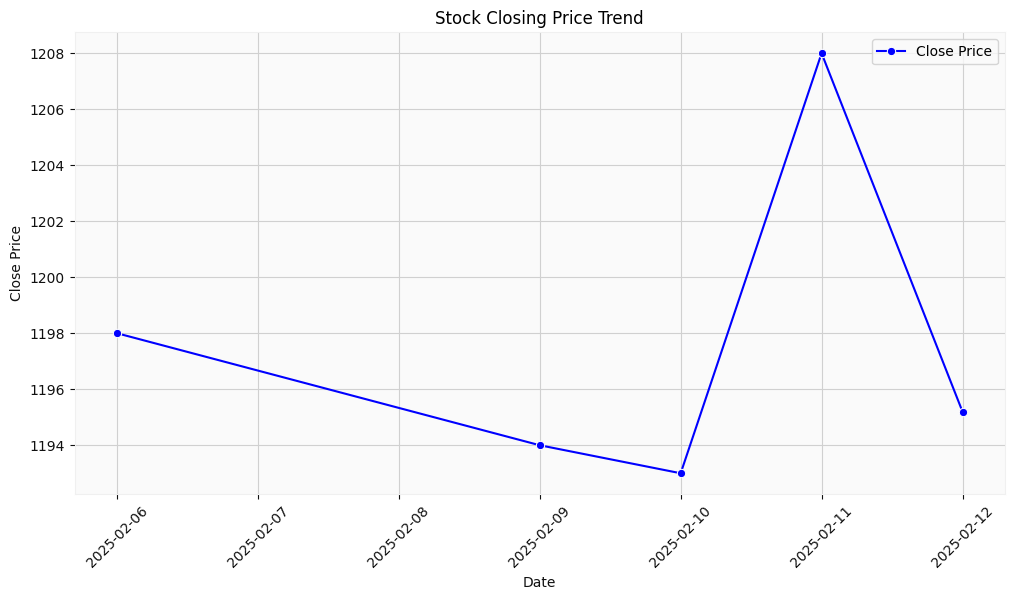

In [74]:
df["BUSINESS DATE"] = pd.to_datetime(df["BUSINESS DATE"])
df = df.sort_values(by="BUSINESS DATE", ascending=True)  # Ensure sorting

last_7_days = df.iloc[-7:]

# Plot the Closing Price Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["BUSINESS DATE"].tail(), y=df["CLOSE PRICE"], marker="o", color="b", label="Close Price")

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Closing Price Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Close Price is decreasing and increasing in the last 7 days data. Holding the share is an appropriate choice and can be sold when the price increases. Or else, if the price goes down further, that would be the right time to buy the share.

In [60]:
# Convert BUSINESS DATE to datetime format
df["BUSINESS DATE"] = pd.to_datetime(df["BUSINESS DATE"])

# Find the row with the highest "HIGH PRICE"
highest_price_row = df[df["HIGH PRICE"] == df["HIGH PRICE"].max()]

# Display the highest price and corresponding buy price
print("Buy Price when the Price was Highest:")
print(highest_price_row[["BUSINESS DATE", "HIGH PRICE", "CLOSE PRICE"]])

Buy Price when the Price was Highest:
    BUSINESS DATE  HIGH PRICE  CLOSE PRICE
122    2024-07-28      1749.0       1660.0


In [61]:
# Convert BUSINESS DATE to datetime format
df["BUSINESS DATE"] = pd.to_datetime(df["BUSINESS DATE"])

# Find the row with the highest "HIGH PRICE"
highest_price_row = df[df["LOW PRICE"] == df["LOW PRICE"].min()]

# Display the highest price and corresponding buy price
print("Buy Price when the Price was Lowest:")
print(highest_price_row[["BUSINESS DATE", "LOW PRICE", "CLOSE PRICE"]])

Buy Price when the Price was Lowest:
   BUSINESS DATE  LOW PRICE  CLOSE PRICE
16    2025-01-19     1136.0       1143.0


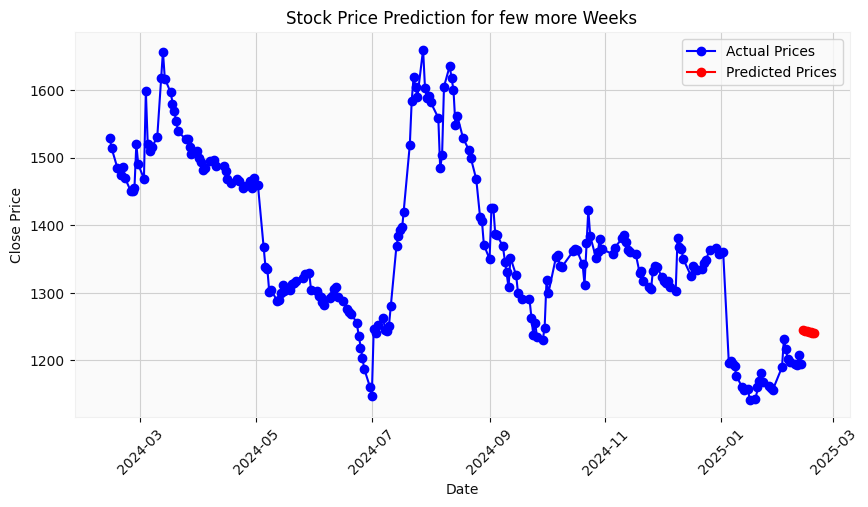

In [92]:
# Convert date column to numerical format for regression modeling
df["Day_Number"] = (df["BUSINESS DATE"] - df["BUSINESS DATE"].min()).dt.days

# Train a simple linear regression model
X = df["Day_Number"].values.reshape(-1, 1)
y = df["CLOSE PRICE"].values

model = LinearRegression()
model.fit(X, y)

# Predict the next 7 days
future_days = np.array([df["Day_Number"].max() + i for i in range(1, 8)]).reshape(-1, 1)
future_dates = [df["BUSINESS DATE"].max() + timedelta(days=i) for i in range(1, 8)]
future_prices = model.predict(future_days)

# Create a new DataFrame for prediction results
future_df = pd.DataFrame({"BUSINESS DATE": future_dates, "PREDICTED CLOSE PRICE": future_prices})

# Combine actual and predicted data for visualization
df_combined = pd.concat([df, future_df], ignore_index=True)

# Plot actual and predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(df["BUSINESS DATE"], df["CLOSE PRICE"], marker='o', label="Actual Prices", color='blue')
plt.plot(future_df["BUSINESS DATE"], future_df["PREDICTED CLOSE PRICE"], marker='o', linestyle="-", color='red', label="Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Price Prediction for few more Weeks")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Again, as per the plot, it is not an appropriate time to sell the shares, but it is an appropriate time to hold the shares. Instead, it might worth buying the share within the next few weeks, but might not be the best time to buy shares, which is the lowest price time.